#Moving Average Investing Model

##Required Libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import yfinance as yf


In [129]:
#Getting the data
# BIOCON.NS is an example where this model and analysis mostly fails
tick = "SBIN.NS"
stock = yf.Ticker(tick)

##Exploring the data

In [130]:
#print(stock.info)
hist = stock.history(period="3y")
print(len(hist))
hist

741


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-19 00:00:00+05:30,397.166903,397.166903,378.026330,382.380798,66155518,0.0,0.0
2021-02-22 00:00:00+05:30,383.385720,383.768526,369.078129,372.762695,52535049,0.0,0.0
2021-02-23 00:00:00+05:30,375.155216,382.524348,372.284130,378.600525,45462768,0.0,0.0
2021-02-24 00:00:00+05:30,379.940392,392.860280,378.217752,388.792908,39632090,0.0,0.0
2021-02-25 00:00:00+05:30,393.338797,397.071203,389.080007,389.749939,46988836,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-13 00:00:00+05:30,708.549988,718.000000,702.150024,713.450012,23351472,0.0,0.0
2024-02-14 00:00:00+05:30,705.549988,748.500000,705.549988,743.400024,36782182,0.0,0.0
2024-02-15 00:00:00+05:30,747.700012,764.000000,741.650024,761.700012,33941282,0.0,0.0


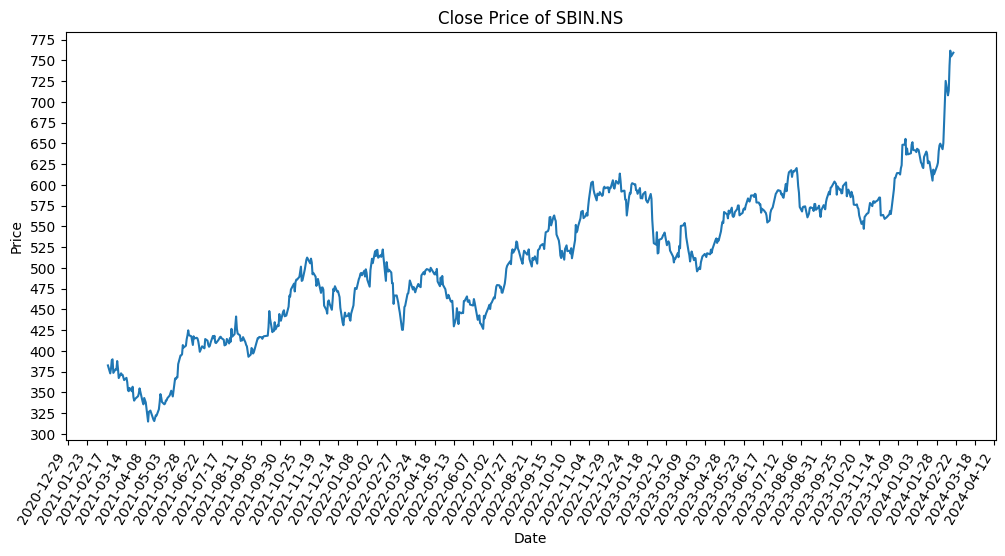

In [131]:
hist['Close'].plot(figsize=(12, 6), title='Close Price of '+tick, ylabel="Price")
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.show()

In [132]:
close_price = pd.DataFrame(hist['Close'])
close_price

,Close
Date,
2021-02-19 00:00:00+05:30,382.380798
2021-02-22 00:00:00+05:30,372.762695
2021-02-23 00:00:00+05:30,378.600525
2021-02-24 00:00:00+05:30,388.792908
2021-02-25 00:00:00+05:30,389.749939
...,...
2024-02-13 00:00:00+05:30,713.450012
2024-02-14 00:00:00+05:30,743.400024
2024-02-15 00:00:00+05:30,761.700012


## Calculating n day moving average

In [133]:
n = 200

def calculate_moving_average(df, window_size=50):
    # Calculate moving average
    moving_avg = df['Close'].rolling(window=window_size, min_periods=1).mean()

    return moving_avg


moving_avg = calculate_moving_average(hist,n)

'''
def add(lst):
    sum = 0
    for ele in lst:
        sum += ele
    return sum

n = 9

for counter in range(1,len(hist)):
    #sum.append([close_price['Date'][counter-1],add(close_price['Close'][:counter])/counter])
    if counter > n:
        close_price['Close'][counter-1] = add(close_price['Close'][counter-n:counter])/n

    else:
        close_price['Close'][counter-1] = add(close_price['Close'][:counter])/counter

'''

"\ndef add(lst):\n    sum = 0\n    for ele in lst:\n        sum += ele\n    return sum \n\nn = 9\n\nfor counter in range(1,len(hist)):\n    #sum.append([close_price['Date'][counter-1],add(close_price['Close'][:counter])/counter])\n    if counter > n:\n        close_price['Close'][counter-1] = add(close_price['Close'][counter-n:counter])/n\n\n    else:\n        close_price['Close'][counter-1] = add(close_price['Close'][:counter])/counter\n\n"

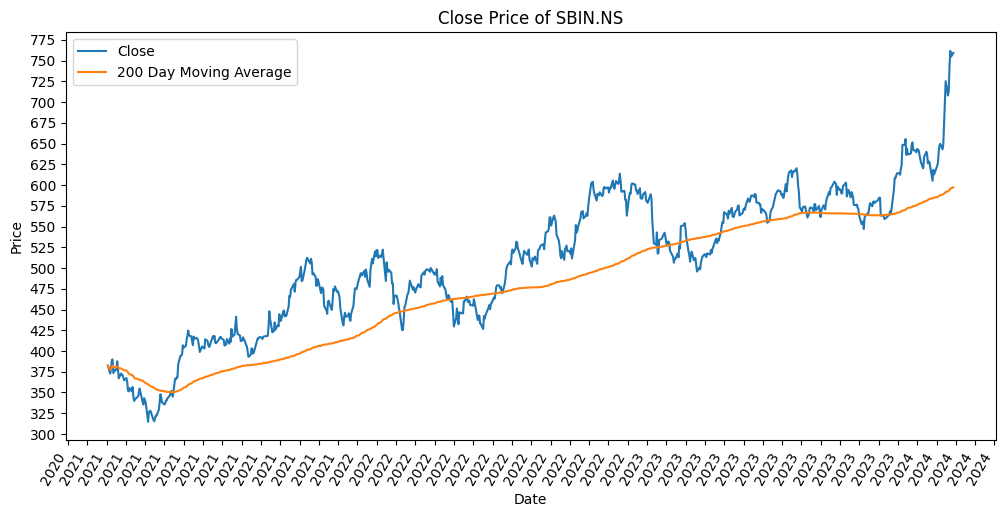

In [134]:
hist['Close'].plot(figsize=(12, 6), title='Close Price of '+tick, ylabel="Price")
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.plot(moving_avg)
legend = str(n) + " Day Moving Average"
plt.legend(["Close", legend])
plt.show()

In [118]:
moving_avg

Date
2021-02-19 00:00:00+05:30    382.380829
2021-02-22 00:00:00+05:30    377.571762
2021-02-23 00:00:00+05:30    377.914703
2021-02-24 00:00:00+05:30    380.634254
2021-02-25 00:00:00+05:30    382.457391
                                ...    
2024-02-13 00:00:00+05:30    593.239561
2024-02-14 00:00:00+05:30    594.201107
2024-02-15 00:00:00+05:30    595.231836
2024-02-16 00:00:00+05:30    596.235413
2024-02-19 00:00:00+05:30    597.195281
Name: Close, Length: 741, dtype: float64

In [119]:
def detect_crossing_above(df):
    # Check if Close price crossed moving average from below to above
    crossed_above = (df['Close'] >= moving_avg) & (df['Close'].shift(1) < moving_avg.shift(1))
    return crossed_above

def detect_crossing_below(df):
    # Check if Close price crossed moving average from above to below
    crossed_below = (df['Close'] <= moving_avg) & (df['Close'].shift(1) > moving_avg.shift(1))
    return crossed_below


crossover_above = detect_crossing_above(hist)
crossover_below = detect_crossing_below(hist)

# Print the dates where crossover occurred
print(pd.DataFrame({'Close': hist[crossover_above]["Close"], 'Moving Average': moving_avg[crossover_above]}))
print(pd.DataFrame({'Close': hist[crossover_below]["Close"], 'Moving Average': moving_avg[crossover_below]}))

                                Close  Moving Average
Date                                                 
2021-02-23 00:00:00+05:30  378.600586      377.914703
2021-03-03 00:00:00+05:30  387.644470      380.950606
2021-05-12 00:00:00+05:30  351.899475      350.570252
2021-05-17 00:00:00+05:30  366.637695      350.757005
2022-03-10 00:00:00+05:30  452.700684      448.490754
2022-05-30 00:00:00+05:30  465.553131      464.261750
2022-07-06 00:00:00+05:30  470.801147      469.470329
2022-07-18 00:00:00+05:30  480.953827      471.368540
2023-02-03 00:00:00+05:30  533.826416      525.320842
2023-03-03 00:00:00+05:30  550.502380      531.198157
2023-04-24 00:00:00+05:30  544.028137      542.393426
2023-06-27 00:00:00+05:30  566.099976      557.461647
2023-08-17 00:00:00+05:30  572.150024      566.688868
2023-09-01 00:00:00+05:30  569.549988      566.206215
2023-10-30 00:00:00+05:30  565.200012      564.057028
2023-11-20 00:00:00+05:30  563.750000      563.469787
2023-11-28 00:00:00+05:30  5

In [120]:
df1 = hist[crossover_above]
df2 = hist[crossover_below]

profits = []
periods = []

first_date_df1 = df1.index[0]
first_date_df2 = df2.index[0]

# Check if the first date in df1 is less than the first date in df2
if first_date_df1 < first_date_df2:
    # Calculate profit and period for every pair of dates
    for index, row in df2.iterrows():
        closest_date_df1 = df1.index[df1.index < index].max()
        if closest_date_df1 is not None:
            profit = ((row['Close'] / df1.loc[closest_date_df1, 'Close']) - 1)*100
            period = pd.Timestamp(index) - pd.Timestamp(closest_date_df1)
            profits.append(profit)
            periods.append(period.days)


print("Profits:", profits)
print("Periods:", periods)
print("Total Profits:", round(sum(profits),2), "%")
print("Total Investment Periods:", sum(periods), "days")


Profits: [-1.3776577496795062, -2.320707359765539, -1.9717212026458708, 21.69537598851472, 1.5361637136499517, -1.3695748576964872, -0.12501286687445212, 7.5565922234887895, -2.4255757806922573, -5.55951922022575, 1.943252132726192, -0.9362282320332316, -1.8876253372854923, -1.1324751725525162, -0.38040063121494994, -0.3991130820399147]
Periods: [3, 1, 2, 291, 60, 1, 8, 198, 14, 10, 60, 48, 14, 49, 18, 1]
Total Profits: 12.85 %
Total Investment Periods: 778 days


In [110]:
# SBIN Vs BIOCON (n = 200)

# SBIN.NS 3y Period (2021-02-19 - 2024-02-19)
# Profits: [-1.3776577496795062, -2.320707359765539, -1.9717212026458708, 21.69537598851472, 1.5361637136499517,
#           -1.3695748576964872, -0.12501286687445212, 7.5565922234887895, -2.4255757806922573, -5.55951922022575,
#           1.943252132726192, -0.9362282320332316, -1.8876253372854923, -1.1324751725525162, -0.38040063121494994,
#           -0.3991130820399147]

# Periods: [3, 1, 2, 291, 60, 1, 8, 198, 14, 10, 60, 48, 14, 49, 18, 1]
# Total Profits: 12.85 %
# Total Investment Periods: 778 days


# BIOCON.NS 3y Period (2021-02-19 - 2024-02-19)
# Profits: [-1.9105064250959147, -0.26538312162724953, -1.68922871816366, -0.11372457581323436, -2.227932637605723,
#           -1.8014655327835083, -2.0405651608479958, -2.46650913687424, -2.5731464393732195, -1.1402800828953619,
#           -3.9807598005997757, -7.257736060672759, -3.168872609814899, -6.91959619941509, -4.329526231262559,
#           -1.1106590453484166, -1.3415892672858587]

# Periods: [1, 4, 5, 7, 23, 16, 11, 12, 1, 3, 2, 27, 14, 25, 84, 1, 1]
# Total Profits: -44.34 %
# Total Investment Periods: 237 days


# Currently our model does not know how to avoid making a loss while investing using moving average
# Even with SBIN, we only had 12.85% profit over 3y because it executed a few trades that resulted in a loss
# This is better explained in the next section
# One of the great things about this model is that it will never make a major loss, example, before the stock
# price drops by 50%, our model should triger the sell action

## Important Considerations

In [87]:
# We need our model to know if the stock has an upward trend overall
# otherwise, it will start investing in stocks having a downward trend, which
# will result in buying high and selling low, instead of the opposite required

# Demonstration of why the above is important


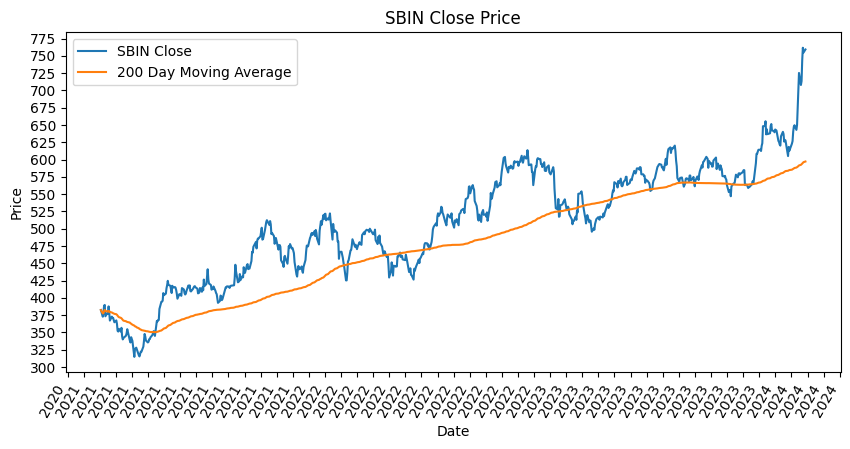

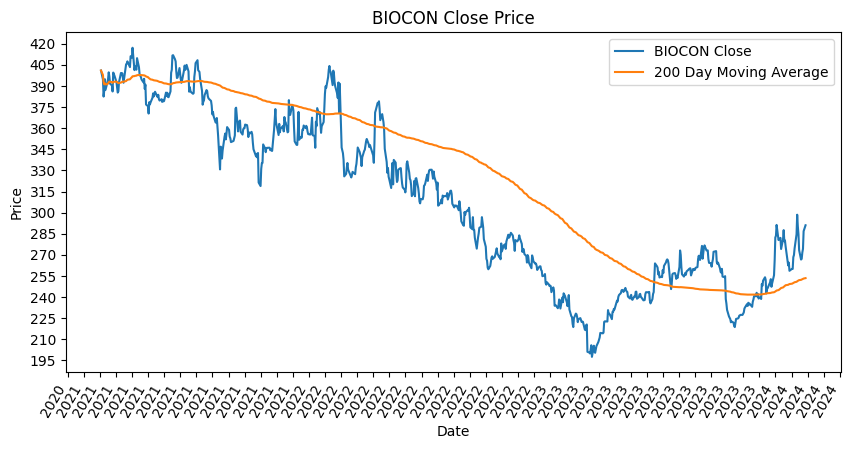

In [135]:
stocks = yf.Tickers("SBIN.NS BIOCON.NS")
hist1 = stocks.tickers["SBIN.NS"].history(period="3y")
hist2 = stocks.tickers["BIOCON.NS"].history(period="3y")
n = 200

moving_avg = calculate_moving_average(hist1,n)
hist1['Close'].plot(figsize=(10, 5), title='SBIN Close Price', ylabel="Price")
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.plot(moving_avg)
legend = str(n) + " Day Moving Average"
plt.legend(["SBIN Close", legend])
plt.show()
print()
moving_avg = calculate_moving_average(hist2,n)
hist2['Close'].plot(figsize=(10, 5), title='BIOCON Close Price', ylabel="Price")
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.plot(moving_avg)
legend = str(n) + " Day Moving Average"
plt.legend(["BIOCON Close", legend])
plt.show()

In [ ]:
# How can we deal with this?
# We could look at the slope of the n moving average to determine the
# trend (upward/downward) of the stock
# however, that would not be able to detect a possible reversion in the
# n moving average.
# example: stock of GOOGL
# at sometime in April 2023, we should have bought the stock, however since the
# slope of the moving average during that period (consider the period as the
# previous 3 days) is negative, the buy signal would have never triggered.

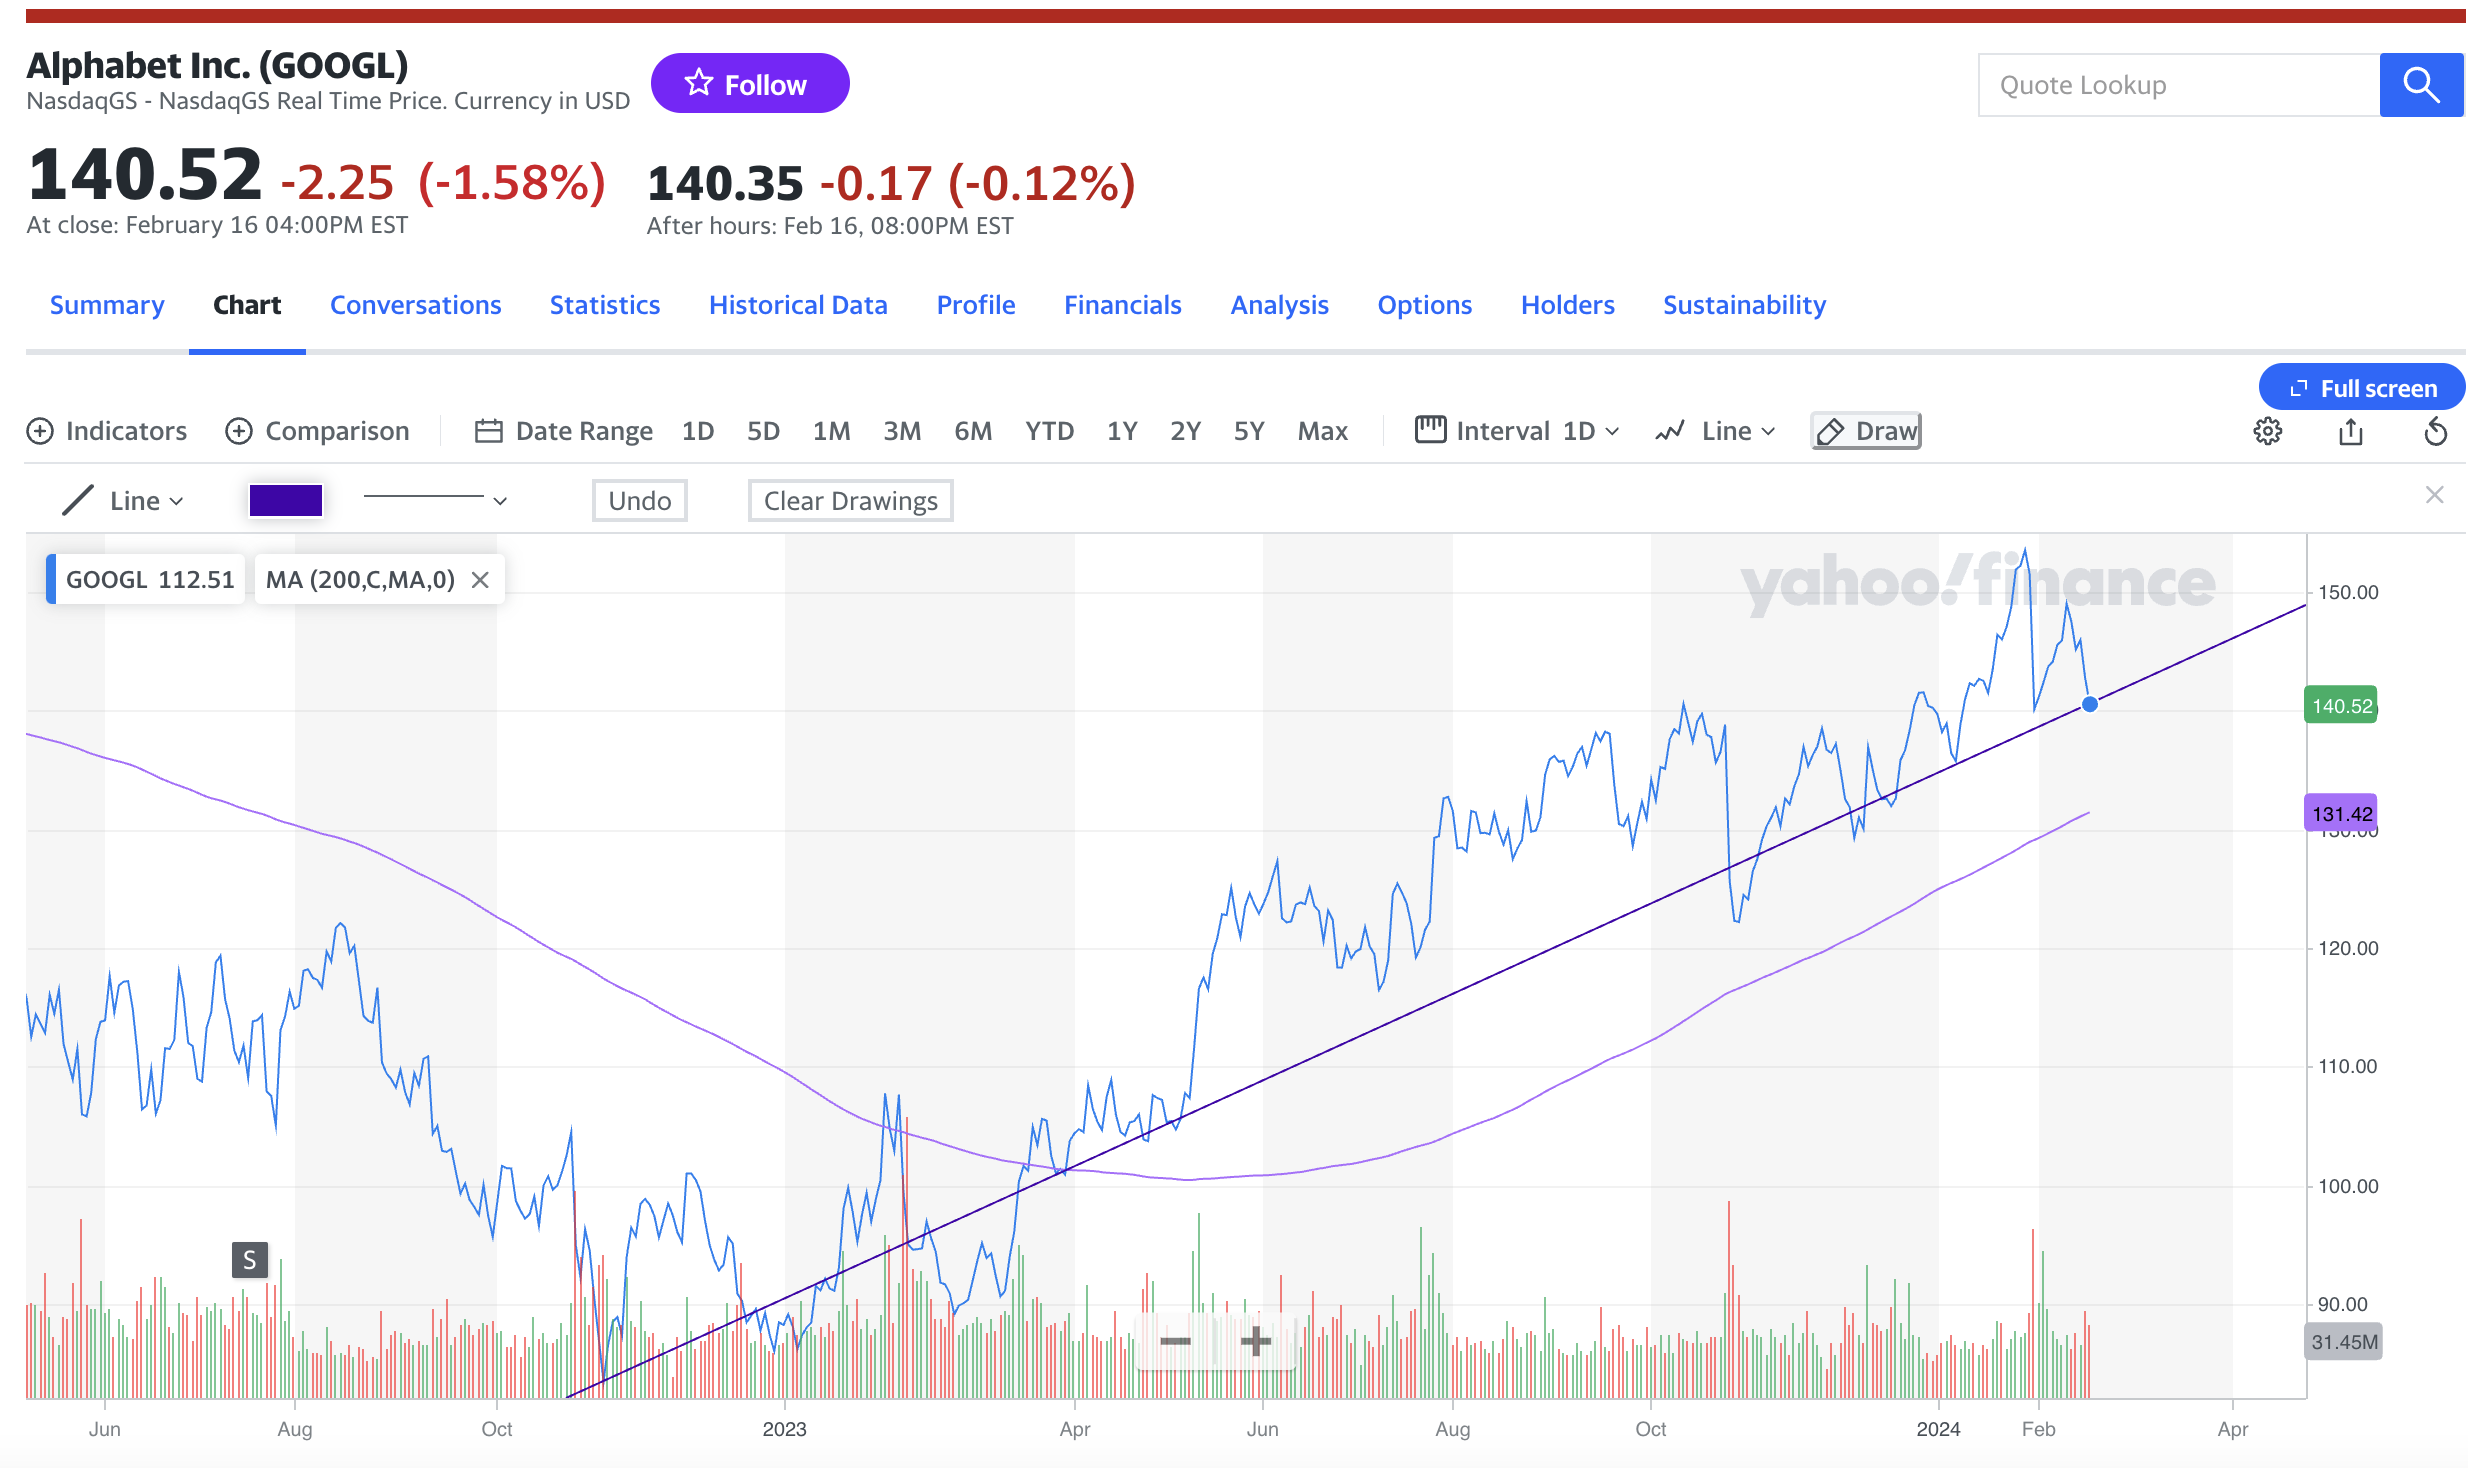

In [ ]:
# What can we do instead of looking at the slope of the moving average?
# Polynomial Regression seems like a good option

In [136]:
from sklearn.linear_model import LinearRegression  # liner regression model
from sklearn.preprocessing import PolynomialFeatures # polynommial features(extended features)


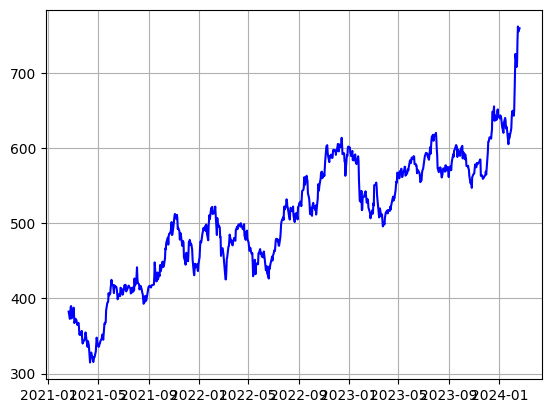

In [145]:
X = hist.index
y = hist['Close']
plt.plot(X,y,"b")
plt.grid(True)

In [152]:
poly_features = PolynomialFeatures(degree=2) # decide the maximal degree of the polynomial feature
X_ploy = poly_features.fit_transform([[range(len(hist)),hist['Close'][k]] for k in range(len(hist))]) # convert the original feature to polynomial feature


# check the extened polynomial features of the first data point
print('original feature:', X[0])
print('polynomial features',X_ploy[0])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (741, 2) + inhomogeneous part.

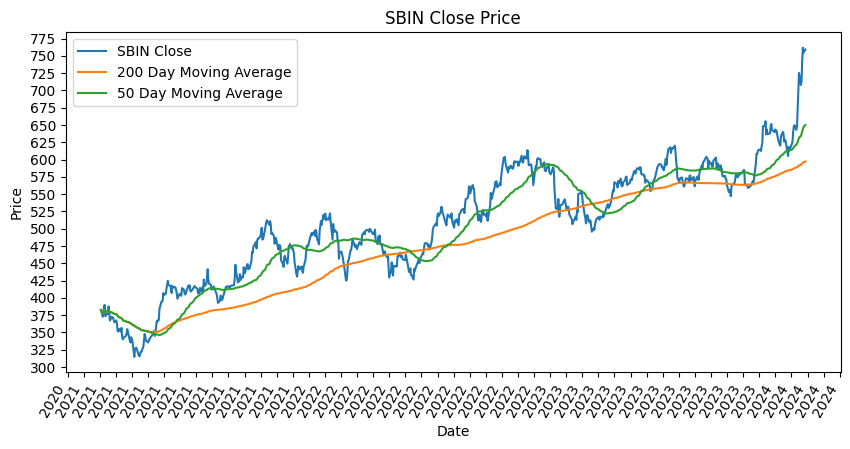

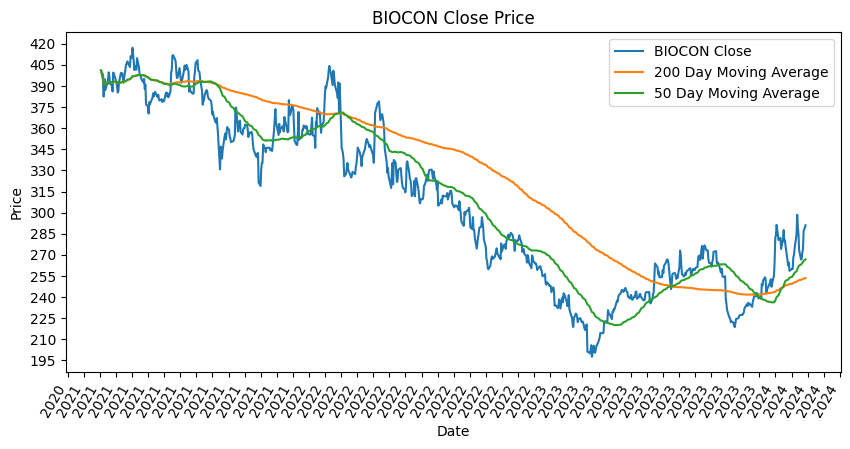

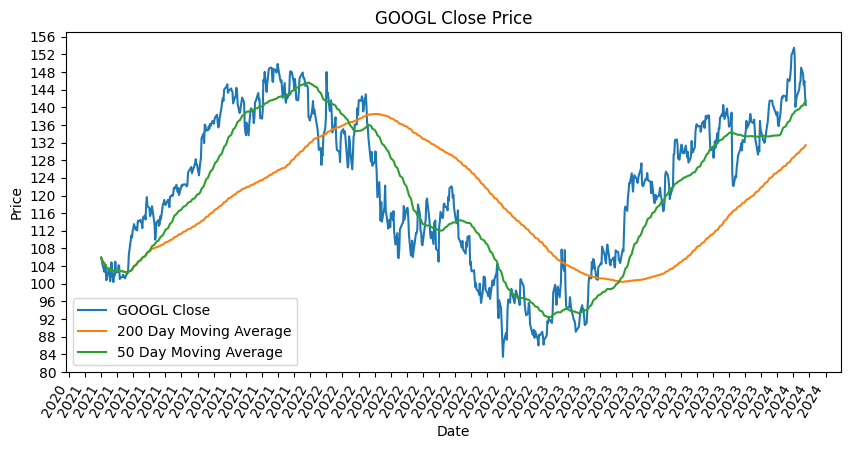

In [157]:
stocks = yf.Tickers("SBIN.NS BIOCON.NS GOOGL")
hist1 = stocks.tickers["SBIN.NS"].history(period="3y")
hist2 = stocks.tickers["BIOCON.NS"].history(period="3y")
hist3 = stocks.tickers["GOOGL"].history(period="3y")
n = 200
m = 50

moving_avg_n = calculate_moving_average(hist1,n)
moving_avg_m = calculate_moving_average(hist1,m)
hist1['Close'].plot(figsize=(10, 5), title='SBIN Close Price', ylabel="Price")
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.plot(moving_avg_n)
plt.plot(moving_avg_m)
legend_n = str(n) + " Day Moving Average"
legend_m = str(m) + " Day Moving Average"
plt.legend(["SBIN Close", legend_n, legend_m])
plt.show()
print()
moving_avg = calculate_moving_average(hist2,n)
moving_avg_m = calculate_moving_average(hist2,m)
hist2['Close'].plot(figsize=(10, 5), title='BIOCON Close Price', ylabel="Price")
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.plot(moving_avg)
plt.plot(moving_avg_m)
legend_n = str(n) + " Day Moving Average"
legend_m = str(m) + " Day Moving Average"
plt.legend(["BIOCON Close", legend_n, legend_m])
plt.show()
print()
moving_avg = calculate_moving_average(hist3,n)
moving_avg_m = calculate_moving_average(hist3,m)
hist3['Close'].plot(figsize=(10, 5), title='GOOGL Close Price', ylabel="Price")
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.plot(moving_avg)
plt.plot(moving_avg_m)
legend_n = str(n) + " Day Moving Average"
legend_m = str(m) + " Day Moving Average"
plt.legend(["GOOGL Close", legend_n, legend_m])
plt.show()

## Tasks remaining


### 1. Figure out a way to detect upward/downward trend (Explore Polynomial Regression)

### 2. Hypertuning the parameters

### 2. Setup paper investing simulator

### 3. Connect with API that can automatically buy/sell stocks